In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np

In [40]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [41]:
len(X_test)

10000

In [42]:
# X_train[0]
X_train[0].shape

(28, 28)

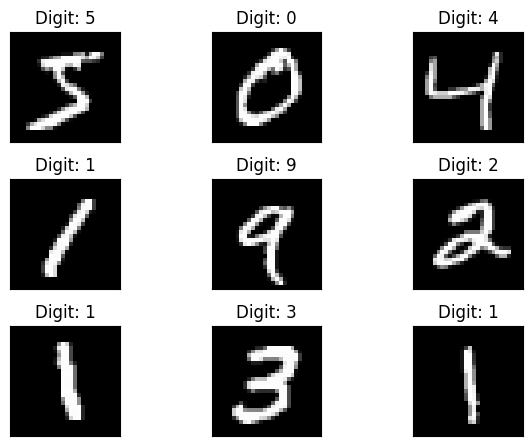

In [43]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i],cmap='gray')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [44]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [45]:
X_train/=255
X_test/=255

In [70]:
# X_train[0]

In [47]:
n_classes=10
print('before: {}'.format(y_train.shape))
y_train=tf.keras.utils.to_categorical(y_train,n_classes)
y_test=tf.keras.utils.to_categorical(y_test,n_classes)
print('after: {} '.format(y_train.shape))

before: (60000,)
after: (60000, 10) 


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping

In [49]:
model=Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [50]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [54]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history=model.fit(X_train,y_train,
                  batch_size=128,epochs=20,
                  verbose=2,
                  validation_data=(X_test,y_test), callbacks=[early_stopping])

Epoch 1/20
469/469 - 10s - loss: 0.2461 - accuracy: 0.9261 - val_loss: 0.1072 - val_accuracy: 0.9676 - 10s/epoch - 22ms/step
Epoch 2/20
469/469 - 8s - loss: 0.0996 - accuracy: 0.9689 - val_loss: 0.0815 - val_accuracy: 0.9744 - 8s/epoch - 18ms/step
Epoch 3/20
469/469 - 10s - loss: 0.0718 - accuracy: 0.9771 - val_loss: 0.0665 - val_accuracy: 0.9795 - 10s/epoch - 21ms/step
Epoch 4/20
469/469 - 9s - loss: 0.0570 - accuracy: 0.9814 - val_loss: 0.0735 - val_accuracy: 0.9780 - 9s/epoch - 20ms/step
Epoch 5/20
469/469 - 9s - loss: 0.0450 - accuracy: 0.9852 - val_loss: 0.0636 - val_accuracy: 0.9803 - 9s/epoch - 19ms/step
Epoch 6/20
469/469 - 8s - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0699 - val_accuracy: 0.9795 - 8s/epoch - 17ms/step
Epoch 7/20
469/469 - 9s - loss: 0.0339 - accuracy: 0.9883 - val_loss: 0.0716 - val_accuracy: 0.9796 - 9s/epoch - 19ms/step
Epoch 8/20
469/469 - 9s - loss: 0.0297 - accuracy: 0.9901 - val_loss: 0.0726 - val_accuracy: 0.9816 - 9s/epoch - 19ms/step
Epoch 9/20
4

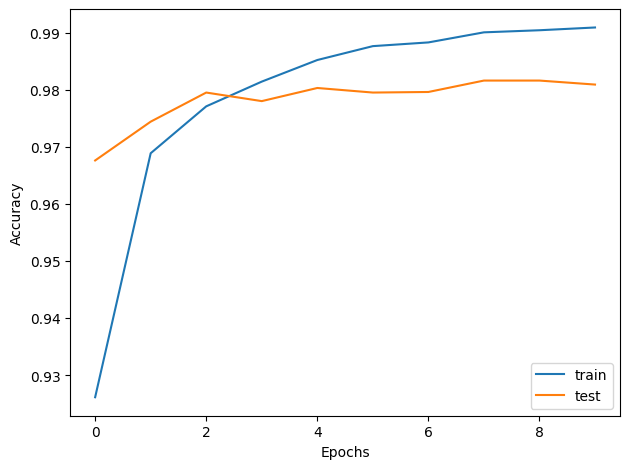

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc='lower right')
plt.tight_layout()

In [68]:
loss_and_accuracy=model.evaluate(X_test,y_test)
print("Test Loss",loss_and_accuracy[0])
print("Test Accuracy",loss_and_accuracy[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0742 - accuracy: 0.9809
Test Loss 0.07420440763235092
Test Accuracy 0.98089998960495
